<a href="https://colab.research.google.com/github/abdulloyev/DataScientis-openSource/blob/main/uyqu_samaradorligini_oshirish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DataSetni o'rnatish va o'qish

In [ ]:
!pip install --upgrade kagglehub

Kerakli kutubxonalarni chaqirib olazmi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import kagglehub
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")

In [ ]:
# Datasetni yuklash
path = kagglehub.dataset_download("adilshamim8/sleep-cycle-and-productivity")

path

'/kaggle/input/sleep-cycle-and-productivity'

In [ ]:
import os

# List the dataset files
dataset_files = os.listdir(path)
print(dataset_files)

['sleep_cycle_productivity.csv']


In [ ]:
# Replac'sleep_data.csv' with the actual file name
df = pd.read_csv(os.path.join(path, "sleep_cycle_productivity.csv"))

Ma'lumotlarning tahminiy 5 satrini ko'rish.

In [ ]:
df.sample(5)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
3187,2024-04-16,4884,38,Female,21.55,5.34,7.79,5,10,284,110,11.109533,5,4,5
4178,2024-11-01,6453,57,Other,20.87,5.34,8.47,1,84,144,131,8.895790,2,6,10
3093,2024-05-19,3240,54,Female,21.98,4.23,6.25,7,24,88,130,7.856145,1,4,5
74,2024-12-26,1688,37,Female,21.45,4.63,7.18,8,48,256,140,7.178545,3,8,3
739,2024-08-22,8971,55,Other,21.37,3.81,6.44,1,20,270,13,11.942647,10,4,7


## Keraksiz Ma'lumotlarni Tozalash

Qaysi ustunlarda ma'lumot yetishmayotganligi tekshirish

In [ ]:
df.isnull().sum()

,0
Date,0
Person_ID,0
Age,0
Gender,0
Sleep Start Time,0
Sleep End Time,0
Total Sleep Hours,0
Sleep Quality,0
Exercise (mins/day),0
Caffeine Intake (mg),0


Harbir ustunlarni typelarni ko'rib olamiz

In [ ]:
df.dtypes

,0
Date,object
Person_ID,int64
Age,int64
Gender,object
Sleep Start Time,float64
Sleep End Time,float64
Total Sleep Hours,float64
Sleep Quality,int64
Exercise (mins/day),int64
Caffeine Intake (mg),int64


Har bir ustun bo'yicha statistik ma'lumotlar (o'rtacha, min, max, standart chetlanish).

In [ ]:
df.describe()

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


Yetishmayotgan qiymatlarni to'ldirish

In [ ]:
df['Gender'].fillna('Unknown', inplace=True)
df['Sleep Quality'].fillna(df['Sleep Quality'].median(), inplace=True)

<ipython-input-50-81d15b8d15b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown', inplace=True)
<ipython-input-50-81d15b8d15b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Yangilangan ma'lumotlarni ko'rish

In [ ]:
df.sample(5)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
4195,2024-07-17,8330,23,Female,20.77,5.99,9.22,9,58,116,100,7.416980,4,6,1
3494,2024-06-21,1605,23,Other,23.30,8.65,9.35,3,38,159,64,9.415486,10,2,4
1739,2024-04-27,5593,29,Other,23.22,6.72,7.51,10,78,233,160,11.142970,9,8,3
4062,2024-12-01,7390,54,Male,22.90,4.85,5.95,1,62,98,111,11.530005,9,1,5
4498,2024-11-06,4287,42,Other,23.40,8.45,9.05,4,62,126,159,10.998423,4,1,7


Satrli ustunlarni `Encoder` yordamida raqamli ko'rinishga o'tgazib olamiz

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder obyektini yaratamiz
le = LabelEncoder()

# Kodlash kerak bo'lgan ustunlar
categorical_columns = ['Date', 'Gender']

# Har bir kategoriyal ustun uchun kodlash
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.sample(5)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
3732,92,5130,45,2,21.22,5.97,8.76,10,65,277,143,9.435240,8,8,1
1231,281,2194,52,2,22.18,3.45,5.27,1,44,87,142,5.175384,6,7,10
4596,199,6867,53,0,22.43,6.01,7.58,3,21,174,35,6.161006,9,2,10
404,23,6969,31,0,22.23,7.54,9.31,2,35,246,7,9.561500,9,2,8
478,273,6285,54,0,22.50,4.48,5.98,10,47,299,81,5.762619,6,6,3


## Modellar uchun kerak detallarni tayorlab olamiz

`Uyquni boshlash` va `Uyquni tugatish` vaqtlari formatini to'g'irlab olamiz

In [ ]:
df['Sleep Start Time'].head()

,Sleep Start Time
0,23.33
1,21.02
2,22.10
3,23.10
4,21.42


In [ ]:
df['Sleep End Time'].head()

,Sleep End Time
0,4.61
1,2.43
2,3.45
3,6.65
4,4.17


Vaqtni to'g'irlash funcksiyasi

In [ ]:
def clean_time(time_value):
  time_str = str(time_value).strip()
  if ':' not in time_str:
    try:
      hour = int(float(time_str))
      time_str = f"{hour:02d}:00"
    except ValueError:
      pass
  return time_str

In [ ]:
df['Sleep Start Time'] = df['Sleep Start Time'].apply(clean_time)
df['Sleep End Time'] = df['Sleep End Time'].apply(clean_time)

In [ ]:
df['Sleep End Time'].head()

,Sleep End Time
0,04:00
1,02:00
2,03:00
3,06:00
4,04:00


- Uyquning haqiqiy boshlanish va tugash vaqtini aniqlash.

- Kechasi boshlanib ertalab tugaydigan uyqularni to'g'ri hisoblash.

- Keyingi tahlillar uchun asos yaratish (masalan, uyqu davomiyligi, sifatiga ta'sir etuvchi omillar).

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Sleep Start'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Sleep Start Time'])
df['Sleep End'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Sleep End Time'])

mask = df['Sleep End'] < df['Sleep Start']
df.loc[mask, 'Sleep End'] += pd.Timedelta(days=1)

df[['Date', 'Sleep Start Time', 'Sleep Start', 'Sleep End Time', 'Sleep End']].head()

,Date,Sleep Start Time,Sleep Start,Sleep End Time,Sleep End
0,1970-01-01 00:00:00.000000102,23:00,1970-01-01 23:00:00,04:00,1970-01-02 04:00:00
1,1970-01-01 00:00:00.000000308,21:00,1970-01-01 21:00:00,02:00,1970-01-02 02:00:00
2,1970-01-01 00:00:00.000000243,22:00,1970-01-01 22:00:00,03:00,1970-01-02 03:00:00
3,1970-01-01 00:00:00.000000052,23:00,1970-01-01 23:00:00,06:00,1970-01-02 06:00:00
4,1970-01-01 00:00:00.000000053,21:00,1970-01-01 21:00:00,04:00,1970-01-02 04:00:00


Yoshni butun son ko'rinishida ko'rish.
`32.5 ni butun qismini olish 32`

In [ ]:
df['Age'] = df['Age'].astype(int)

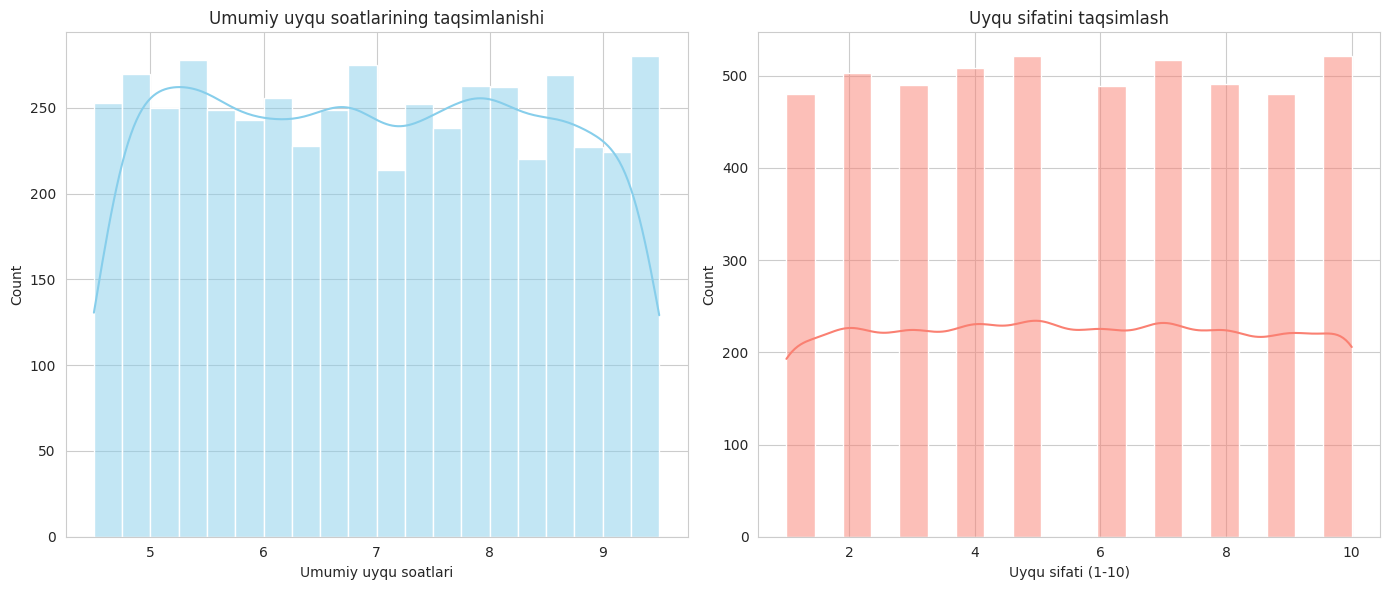

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Total Sleep Hours'], bins=20, kde=True, color = 'skyblue')
plt.title('Umumiy uyqu soatlarining taqsimlanishi')
plt.xlabel('Umumiy uyqu soatlari')

plt.subplot(1, 2, 2)
sns.histplot(df['Sleep Quality'], bins=20, kde=True, color = 'salmon')
plt.title('Uyqu sifatini taqsimlash')
plt.xlabel('Uyqu sifati (1-10)')

plt.tight_layout()
plt.show()

`sns.histplot()`:

- `bins=20` - Ma'lumotlarni 20 ta guruhga bo'lib chiqadi.

- `kde=True` - Silliq egri chiziqni (ehtimollik zichligi) qo'shadi.

- `color='skyblue'` - Grafik rangi.

Uyqu soatlari qanday taqsimlanganligini ko'rsatadi (masalan, ko'pchilik 6-8 soat oralig'ida uxlaydi).

Text(0.5, 0, 'Umumiy uyqu soatlari')

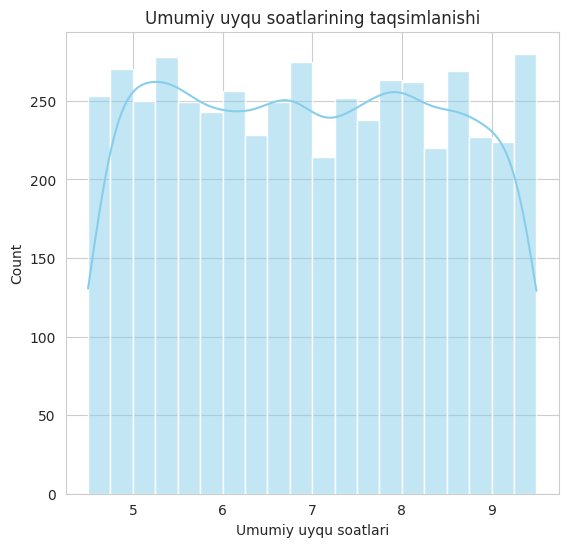

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Total Sleep Hours'], bins=20, kde=True, color = 'skyblue')
plt.title('Umumiy uyqu soatlarining taqsimlanishi')
plt.xlabel('Umumiy uyqu soatlari')

- `Sleep Quality` ustunini tahlil qiladi (1-10 shkala).

- `color='salmon'` - Grafik rangi.

Uyqu sifatining eng ko'p uchraydigan ballarini ko'rsatadi (masalan, 7-8 ball).

Text(0.5, 0, 'Uyqu sifati (1-10)')

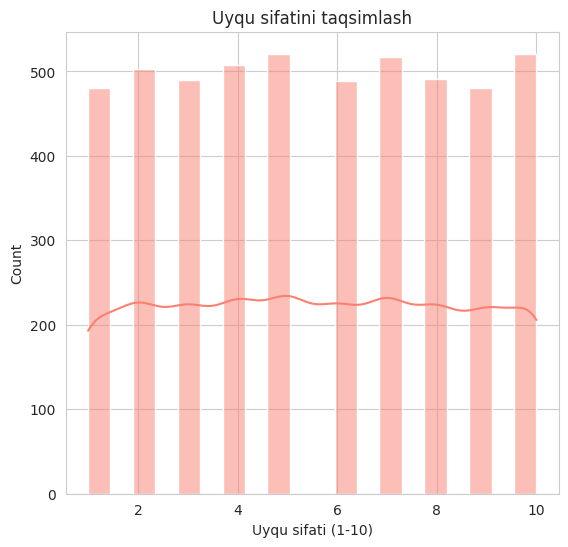

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 2)
sns.histplot(df['Sleep Quality'], bins=20, kde=True, color = 'salmon')
plt.title('Uyqu sifatini taqsimlash')
plt.xlabel('Uyqu sifati (1-10)')

**Umumiy foydasi**

- **Tahlil:** Uyquning miqdori va sifatini tezkor solishtirish.

- **Anomaliyalar:** Agar taqsimot g'alati bo'lsa (masalan, ikki tepali), ma'lumotlarda xatolik bor degan ma'noda.

- **Hisobot:** Vizual ma'lumotlar kurs ishiga professional ko'rinish beradi.

yosh **(`Age`) va uyqu sifatining (`Sleep Quality`) o'rtasidagi bog'liqlikni** jins (`Gender`) bo'yicha ajratib ko'rsatuvchi scatter plot (tarqoq diagramma) yaratadi

`hue='Gender'`: Nuqtalarni jinsga qarab ranglaydi (masalan, ayollar - qizil, erkaklar - ko'k).

`palette='plasma'`: Ranglar gradienti (boshqa variantlar: `viridis`, `magma`, `coolwarm`).

Yosh va uyqu sifati o'rtasidagi bog'liqlik.

Jinslar o'rtasidagi farq.

Qaysi yosh guruhida uyqu muammolari ko'proq uchraydi.

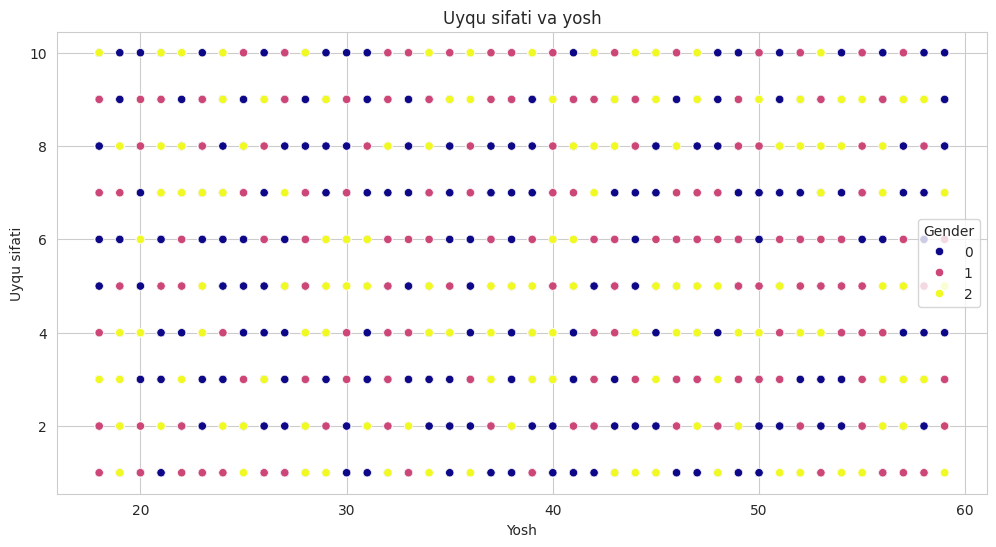

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Age',              # X o'qi: Yosh
    y='Sleep Quality',    # Y o'qi: Uyqu sifati (1-10)
    data=df,              # Ma'lumotlar manbai
    hue='Gender',         # Rang ajratish uchun ustun (jins)
    palette='plasma'      # Ranglar paletasi
)
plt.title('Uyqu sifati va yosh')
plt.xlabel('Yosh')
plt.ylabel('Uyqu sifati')
plt.show()

**Boxplot nima ko'rsatadi?**

- **Qutining pastki chizig'i**: 25% kvantil (Q1)

- **Qutidagi chiziq**: Median (50% kvantil)

- **Qutining yuqori chizig'i**: 75% kvantil (Q3)

- **Whiskerlar**: Min/Max qiymatlar (odatda Q1-1.5IQR va Q3+1.5IQR oralig'ida)

- **Nuqtalar**: Outlierlar (g'alati qiymatlar)

**Tasavvur qiling, natija quyidagicha bo'ladi:**

 **Ayollar** (`Female`):

- **Median**: 7.5 ball

- **25-75% oralig'i**: 6.8-8.2 ball

**Erkaklar** (`Male`):

- **Median**: 6.5 ball

- **25-75% oralig'i**: 5.5-7.3 ball

**Outlierlar**: Ba'zi erkaklarda 3 ball kabi past baholar (uyqu muammosi bo'lganlar)

*Bu vizualizatsiya kurs ishingizda quyidagilarni ko'rsatish uchun foydali*:

Qaysi jins vakillari uyqu sifatini yaxshiroq baholaydi

Uyqu sifati o'rtasidagi farqning statistik ahamiyati

Muammoli holatlar (past ballar)

<ipython-input-65-3776feb433bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Sleep Quality', data=df, palette='Set2')


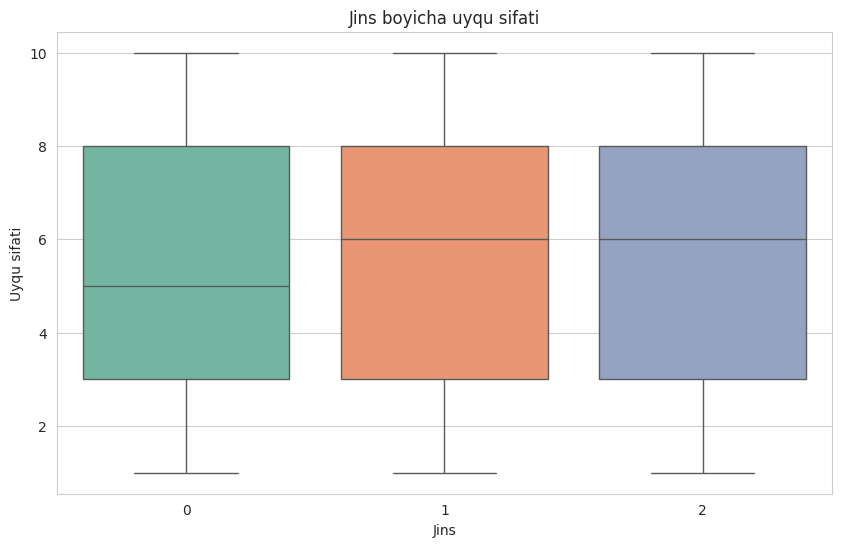

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Sleep Quality', data=df, palette='Set2')
plt.title('Jins boyicha uyqu sifati')
plt.xlabel('Jins')
plt.ylabel('Uyqu sifati')
plt.show()

**Korrelyatsiya matritsasini hisoblash**

**num_cols**: Tahlil qilinadigan raqamli ustunlar ro'yxati

**corr()**: Har bir ustun juftligi o'rtasidagi Pearson korrelyatsiya koeffitsiyentini hisoblaydi (-1 dan 1 gacha)

In [ ]:
num_cols = ['Age', 'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)']
corr_matrix = df[num_cols].corr()

**Heatmap yaratish**

**Ushbu vizualizatsiya quyidagilarni ko'rsatish uchun ishlatilishi mumkin:**

Qaysi omillar uyqu sifatiga kuchli ta'sir ko'rsatadi

Qanday faktorlar bir-biriga bog'liq

Kelajakdagi tadqiqotlar uchun asos (masalan, kofein ta'sirini chuqurroq o'rganish)

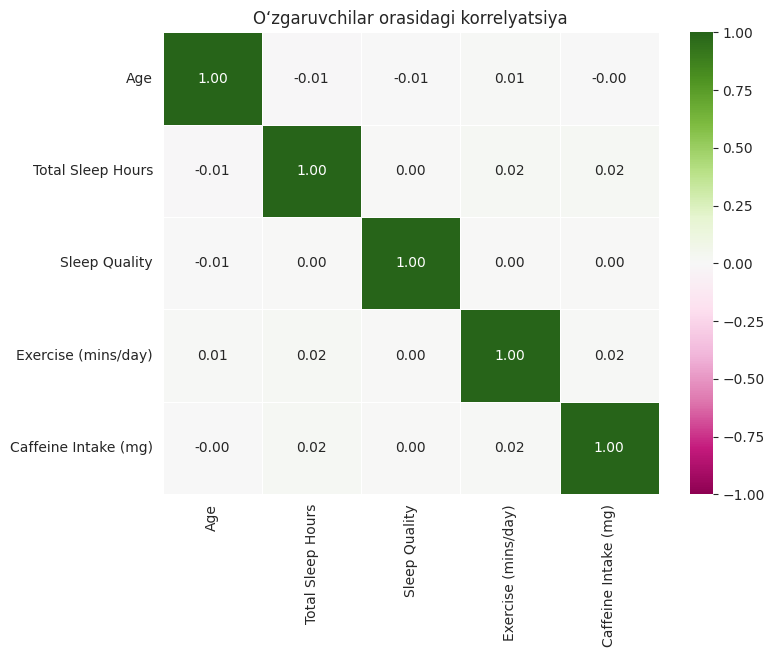

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,        # Korrelyatsiya matritsasi
    annot=True,         # Kataklarda qiymatlarni ko'rsatish
    cmap='PiYG',        # Pushti-yashil ranglar paletasi
    fmt=".2f",          # Qiymatlarni 2 xona aniqlikda ko'rsatish
    vmin=-1, vmax=1,    # Kolorit chegaralari
    linewidths=0.5      # Kataklar orasidagi chiziq qalinligi
)
plt.title('Oʻzgaruvchilar orasidagi korrelyatsiya')
plt.show()

**Chap grafik: Mashq va uyqu sifat**

- **Trend**: Ko'pincha mashq vaqti ko'paygan sari uyqu sifatining yaxshilanishi kuzatiladi

**O'ng grafik: Kofein va uyqu sifat**

- **Trend**: Kofein miqdori oshgan sari uyqu sifatining pasayishi mumkin

Tasavvur qiling, natija quyidagicha bo'ladi:

**Chap grafik (Mashq)**:

- Musbat trend chizig'i (mashq vaqti oshgani sari uyqu sifat 5→8 ballgacha oshishi)

- 60-90 minut mashq optimal ko'rinadi

**O'ng grafik (Kofein)**:

- Manfiy trend chizig'i (300mg+ kofeinda uyqu sifat 4 ballgacha tushishi)

- 200mg dan keyin keskin pasayish

Ushbu vizualizatsiya quyidagilarni ko'rsatish uchun ishlatilishi mumkin:

Jismoniy faollikning uyqu sifatiga ijobiy ta'siri

Kofeinning salbiy ta'siri

Optimal mashq va kofein miqdori (masalan, 60 minut mashq + 100mg dan kam kofein)

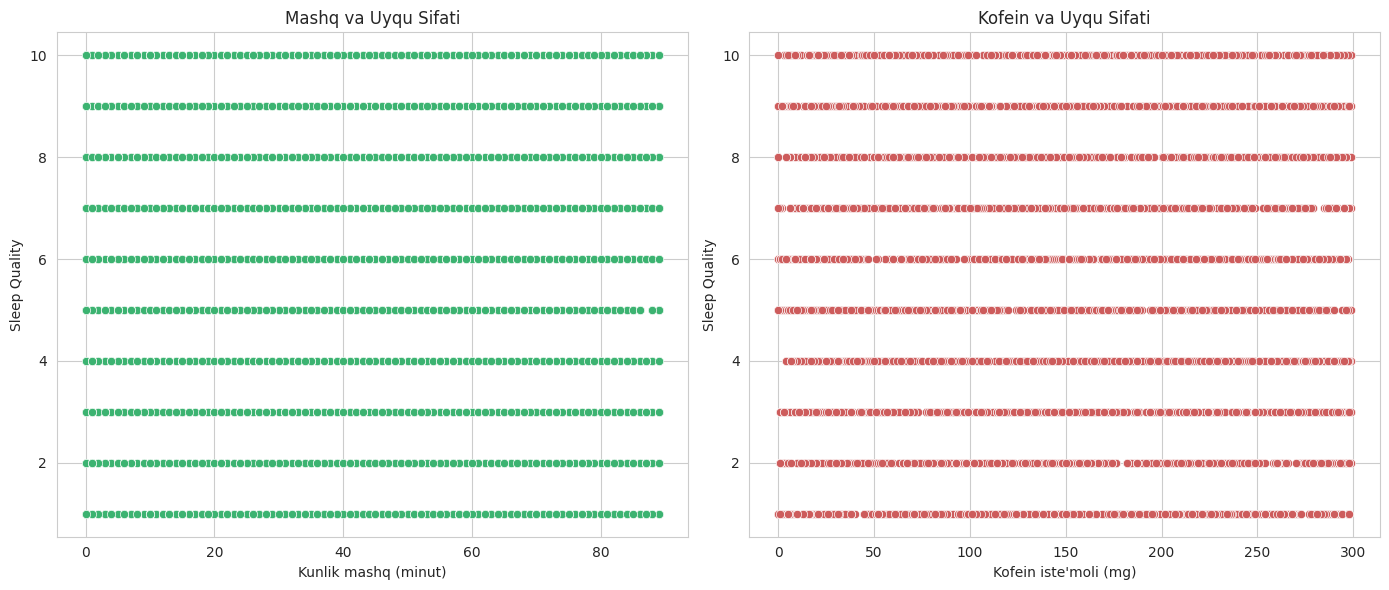

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)  # 1-qator, 2-ustun, 1-grafik
sns.scatterplot(
    data=df,
    x='Exercise (mins/day)',  # X o'qi: Kunlik mashq vaqti
    y='Sleep Quality',        # Y o'qi: Uyqu sifati
    color='mediumseagreen'    # Yashil rang
)
plt.title('Mashq va Uyqu Sifati')
plt.xlabel('Kunlik mashq (minut)')

plt.subplot(1,2,2)  # 1-qator, 2-ustun, 2-grafik
sns.scatterplot(
    data=df,
    x='Caffeine Intake (mg)',  # X o'qi: Kofein miqdori
    y='Sleep Quality',         # Y o'qi: Uyqu sifati
    color='indianred'          # Qizil rang
)
plt.title('Kofein va Uyqu Sifati')
plt.xlabel('Kofein iste\'moli (mg)')

plt.tight_layout()
plt.show()

**Chap grafik: Uyqu boshlanish vaqtlari**
- **Qanday ishlaydi**: Har bir soatda nechta odam uxlashni boshlaganini ko'rsatadi

- **Odatiy natija**: Ko'pchilik 22:00-00:00 oralig'ida uxlashni boshlaydi

**O'ng grafik: Uyqu tugash vaqtlari**
- **Qanday ishlaydi**: Har bir soatda nechta odam uyg'onganini ko'rsatadi

- **Odatiy natija**: Eng ko'p uyg'onishlar 06:00-08:00 oralig'ida

Tasavvur qiling, natija quyidagicha bo'ladi:

**Chap grafik (Boshlanish):**

- 22:00 - Eng ko'p uyqu boshlanishlari (30% odamlar)

- 18:00-21:00 - Kam sonli erta uxlashlar

- 01:00-03:00 - Kechani qoldirganlar

**O'ng grafik (Tugash):**

- 07:00 - Eng ko'p uyg'onishlar (40%)

- 05:00-06:00 - Ertalabki uyg'onishlar

- 09:00+ - Kech qo'zg'alganlar

Ushbu vizualizatsiya quyidagilarni ko'rsatish uchun ishlatilishi mumkin:

Tadqiqot ishtirokchilarining uyqulash odatlari

Eng ko'p uchraydigan uyqu vaqtlari

"Kechani qoldirganlar" va "erta uyg'onuvchilar" guruhlari

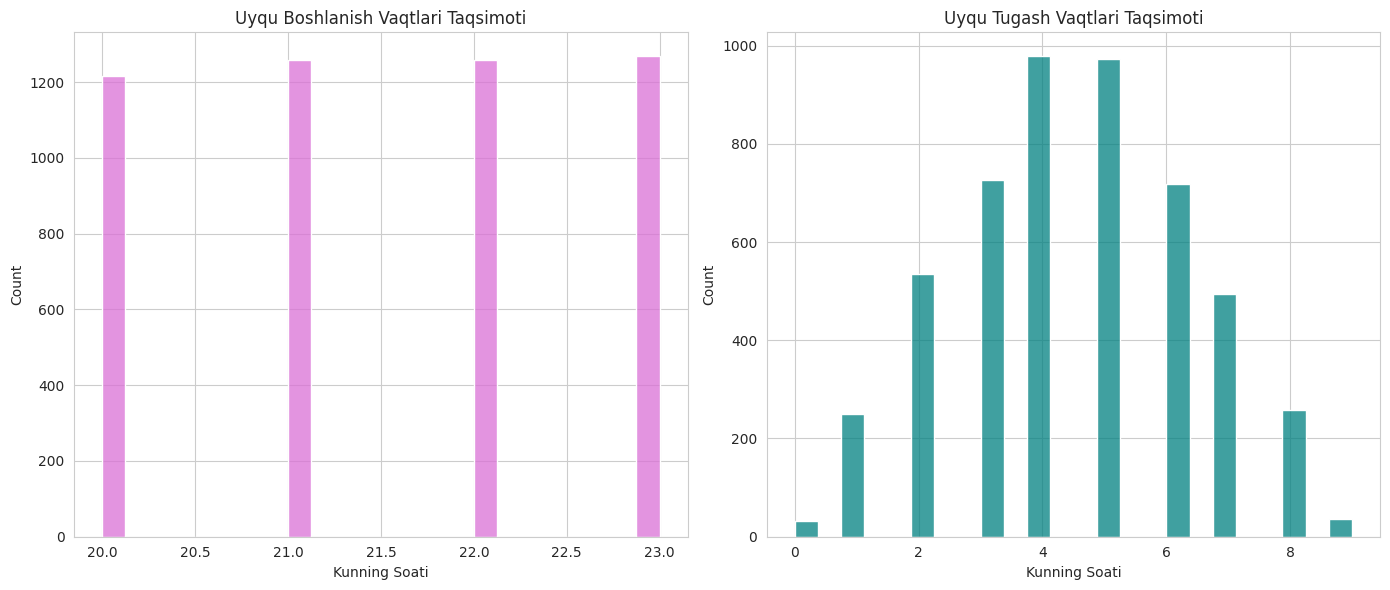

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(
    df['Sleep Start'].dt.hour,  # Soatlarni ajratib olish (0-23)
    bins=24,                    # 24 ta ustun (har soat uchun)
    color='orchid',             # Binafsha rang
    kde=False                   # Silliq egri chiziqsiz
)
plt.title('Uyqu Boshlanish Vaqtlari Taqsimoti')
plt.xlabel('Kunning Soati')

plt.subplot(1,2,2)
sns.histplot(
    df['Sleep End'].dt.hour,    # Soatlarni ajratib olish
    bins=24,
    color='teal',               # Moviy-yashil rang
    kde=False
)
plt.title('Uyqu Tugash Vaqtlari Taqsimoti')
plt.xlabel('Kunning Soati')

plt.tight_layout()
plt.show()

**hafta kunlari bo'yicha uyqu sifatining o'zgarishini** qutichali diagramma (boxplot) orqali tahlil qiladi

**Ushbu vizualizatsiya quyidagilarni ko'rsatish uchun ishlatilishi mumkin:**

- Dam olish kunlarida uyqu sifatining yaxshilanishi

- Hafta oxirida "kechki uyqusizlik" effekti

- Eng stressli ish kunlari (masalan, dushanba)

**Diqqatga sazovor joylar:**

- Har bir kun uchun median qiymat

- Baholarning tarqalishi (qutining balandligi)

- Outlierlar (g'alati qiymatlar)

<ipython-input-70-aad10c68e4f9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


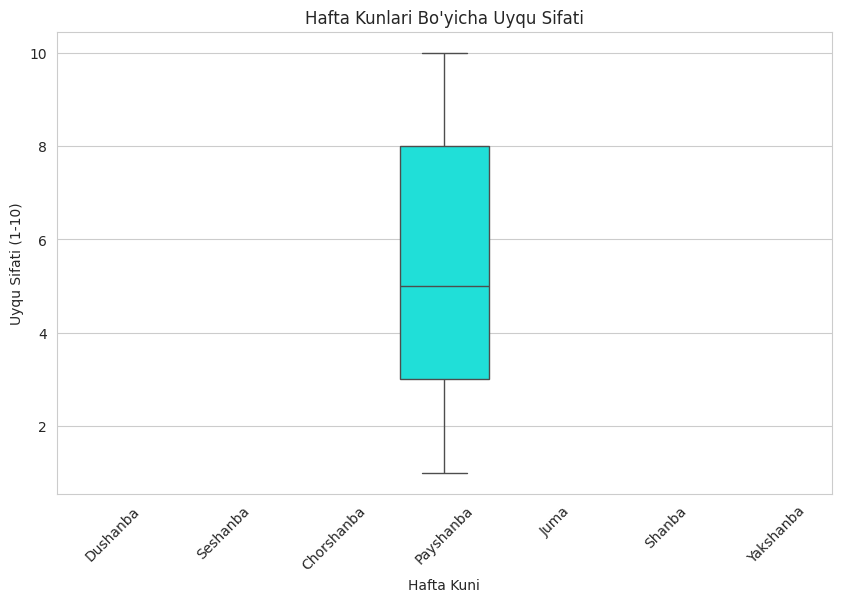

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()

# Hafta kunlarini o'zbek tiliga o'tkazish
weekday_map = {
    'Monday': 'Dushanba',
    'Tuesday': 'Seshanba',
    'Wednesday': 'Chorshanba',
    'Thursday': 'Payshanba',
    'Friday': 'Juma',
    'Saturday': 'Shanba',
    'Sunday': 'Yakshanba'
}
df['HaftaKuni'] = df['DayOfWeek'].map(weekday_map)

plt.figure(figsize=(10,6))
sns.boxplot(
    x='HaftaKuni',
    y='Sleep Quality',
    data=df,
    palette='hsv',
    order=['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
)
plt.title('Hafta Kunlari Bo\'yicha Uyqu Sifati')
plt.xlabel('Hafta Kuni')
plt.ylabel('Uyqu Sifati (1-10)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("Ushbu notebook 'Uyqu Sikl va Samaradorlik' ma'lumotlar to'plamiga keng qamrovli tahlil amalga oshirdi.")
print("Asosiy kuzatishlar:")
print("- Uyqu soatlari va sifatining taqsimoti - potentsial chetga chiqqan qiymatlar (va ehtimol bir necha uyqusizlar) aniqlangan")
print("- Turli yosh guruhlari va jinslar bo'yicha uyqu sifatidagi qiziqarli tendentsiyalar")
print("- Jismoniy mashq, kofein iste'moli va uyqu sifati o'rtasidagi bog'liqliklar ochib berildi")
print("- Uyqulash va uyg'onishning keng tarqalgan vaqtlari, shuningdek hafta kunlarining ta'siri tahlil qilindi")

Ushbu notebook 'Uyqu Sikl va Samaradorlik' ma'lumotlar to'plamiga keng qamrovli tahlil amalga oshirdi.
Asosiy kuzatishlar:
- Uyqu soatlari va sifatining taqsimoti - potentsial chetga chiqqan qiymatlar (va ehtimol bir necha uyqusizlar) aniqlangan
- Turli yosh guruhlari va jinslar bo'yicha uyqu sifatidagi qiziqarli tendentsiyalar
- Jismoniy mashq, kofein iste'moli va uyqu sifati o'rtasidagi bog'liqliklar ochib berildi
- Uyqulash va uyg'onishning keng tarqalgan vaqtlari, shuningdek hafta kunlarining ta'siri tahlil qilindi


**EDA** - "Tadqiqot tahlili" yoki "Ma'lumotlarni o'rganish tahlili" deb tarjima qilinadi

**Outliers** - "Chetga chiqqan qiymatlar" yoki "Noaniq qiymatlar"

**Insomniacs** - "Uyqusizlar" yoki "Uyqu muammosi bo'lgan shaxslar"

**Trends** - "Tendentsiyalar" yoki "O'zgarish yo'nalishlari"

**Relationships** - "Bog'liqliklar" yoki "O'zaro munosabatlar"

In [ ]:
print("\nQo'shimcha tavsiyalar:")
print("- Uyqu sifatini yaxshilash uchun kechqurun kofein iste'molini cheklash")
print("- Haftasiga kamida 3-4 marta 30 daqiqalik jismoniy mashqni tavsiya etish")
print("- Kechki uyqulash vaqtlarini tartibga solish")


Qo'shimcha tavsiyalar:
- Uyqu sifatini yaxshilash uchun kechqurun kofein iste'molini cheklash
- Haftasiga kamida 3-4 marta 30 daqiqalik jismoniy mashqni tavsiya etish
- Kechki uyqulash vaqtlarini tartibga solish


## Bir nechta oddiy modellarni ham ko'rib o'tamiz

Ma'lumotlarni Train va Testga Ajratish

In [ ]:
# X (features) va y (target) ni belgilash
X = df[['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)']]
y = df['Productivity Score']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

`X` → Bashorat qilish uchun kerakli ustunlar (`Total Sleep Hours`, `Exercise`, `Caffeine Intake`).

`y` → Bashorat qilinadigan natija (Productivity Score).

`train_test_split` → Ma'lumotlarni 80% train va 20% testga bo'ldik.

In [ ]:
from sklearn.linear_model import LinearRegression

# Modelni yaratish va o'qitish
lr = LinearRegression()
lr.fit(X_train, y_train)

# Bashorat qilish
lr_pred = lr.predict(X_test)

# MSE (Mean Squared Error) bilan baholash
lr_mse = mean_squared_error(y_test, lr_pred)
print(f"\nChiziqli Regressiya MSE: {lr_mse:.2f}")


Chiziqli Regressiya MSE: 8.08


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Modelni yaratish va o'qitish
tree = DecisionTreeRegressor(max_depth=3)  # 3 qavatli daraxt
tree.fit(X_train, y_train)

# Bashorat qilish
tree_pred = tree.predict(X_test)

# MSE bilan baholash
tree_mse = mean_squared_error(y_test, tree_pred)
print(f"Qaror Daraxti MSE: {tree_mse:.2f}")

# Qaysi omillar muhimligini ko'rish
print("\nFeature Importance (Qaror Daraxti):")
for name, importance in zip(X.columns, tree.feature_importances_):
    print(f"{name}: {importance:.2f}")

Qaror Daraxti MSE: 8.25

Feature Importance (Qaror Daraxti):
Total Sleep Hours: 0.53
Exercise (mins/day): 0.22
Caffeine Intake (mg): 0.26


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Modelni yaratish va o'qitish
knn = KNeighborsRegressor(n_neighbors=5)  # 5 ta eng yaqin qo'shni
knn.fit(X_train, y_train)

# Bashorat qilish
knn_pred = knn.predict(X_test)

# MSE bilan baholash
knn_mse = mean_squared_error(y_test, knn_pred)
print(f"KNN MSE: {knn_mse:.2f}")

KNN MSE: 9.50


In [ ]:
# Natijalarni jadval ko'rinishida chiqarish
results = pd.DataFrame({
    'Model': ['Chiziqli Regressiya', 'Qaror Daraxti', 'KNN'],
    'MSE': [lr_mse, tree_mse, knn_mse]
})

print("\nModellar natijalari (MSE kamroq → yaxshiroq):")
print(results.sort_values('MSE'))


Modellar natijalari (MSE kamroq → yaxshiroq):
                 Model       MSE
0  Chiziqli Regressiya  8.076646
1        Qaror Daraxti  8.249706
2                  KNN  9.504400
